In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams

In [7]:
df = pd.read_excel("Sample - Superstore.xls")
Technology = df.loc[df['Category'] == 'Technology']

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Sales']
Technology.drop(cols, axis=1, inplace=True)
Technology = Technology.sort_values('Order Date')
Technology.isnull().sum()

Order Date    0
Profit        0
dtype: int64

In [9]:
Technology = Technology.groupby('Order Date')['Profit'].sum().reset_index()

In [10]:
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [11]:
y = Technology['Profit'].resample('MS').mean()

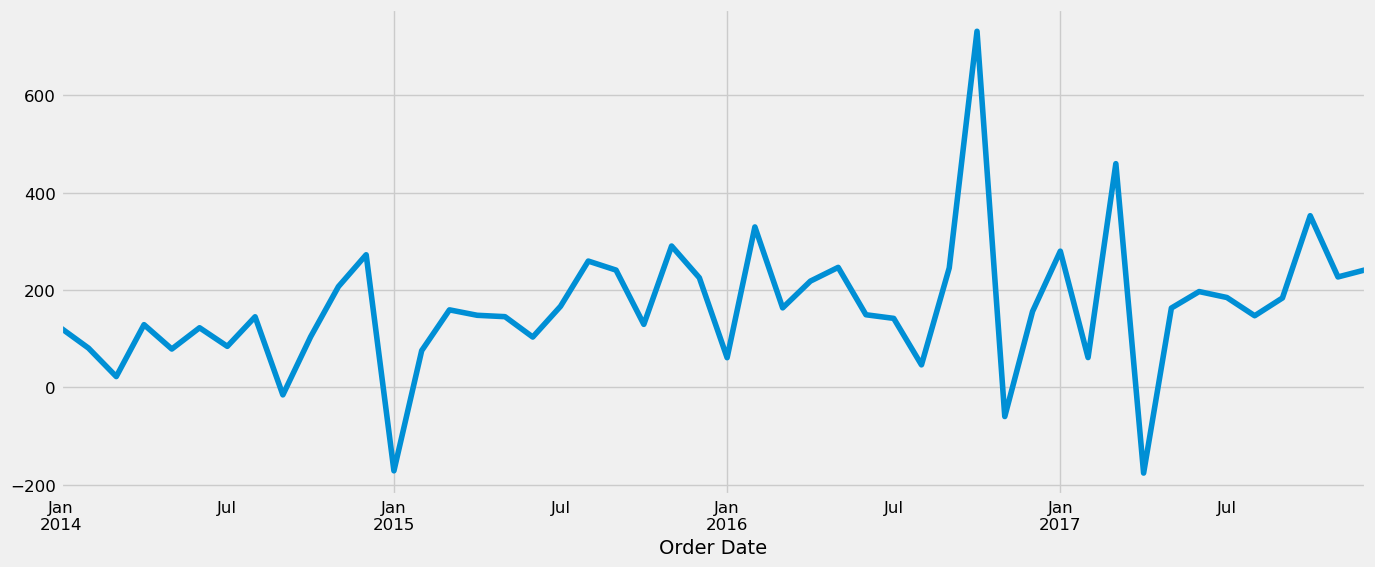

In [12]:
y.plot(figsize=(15, 6))
plt.show()

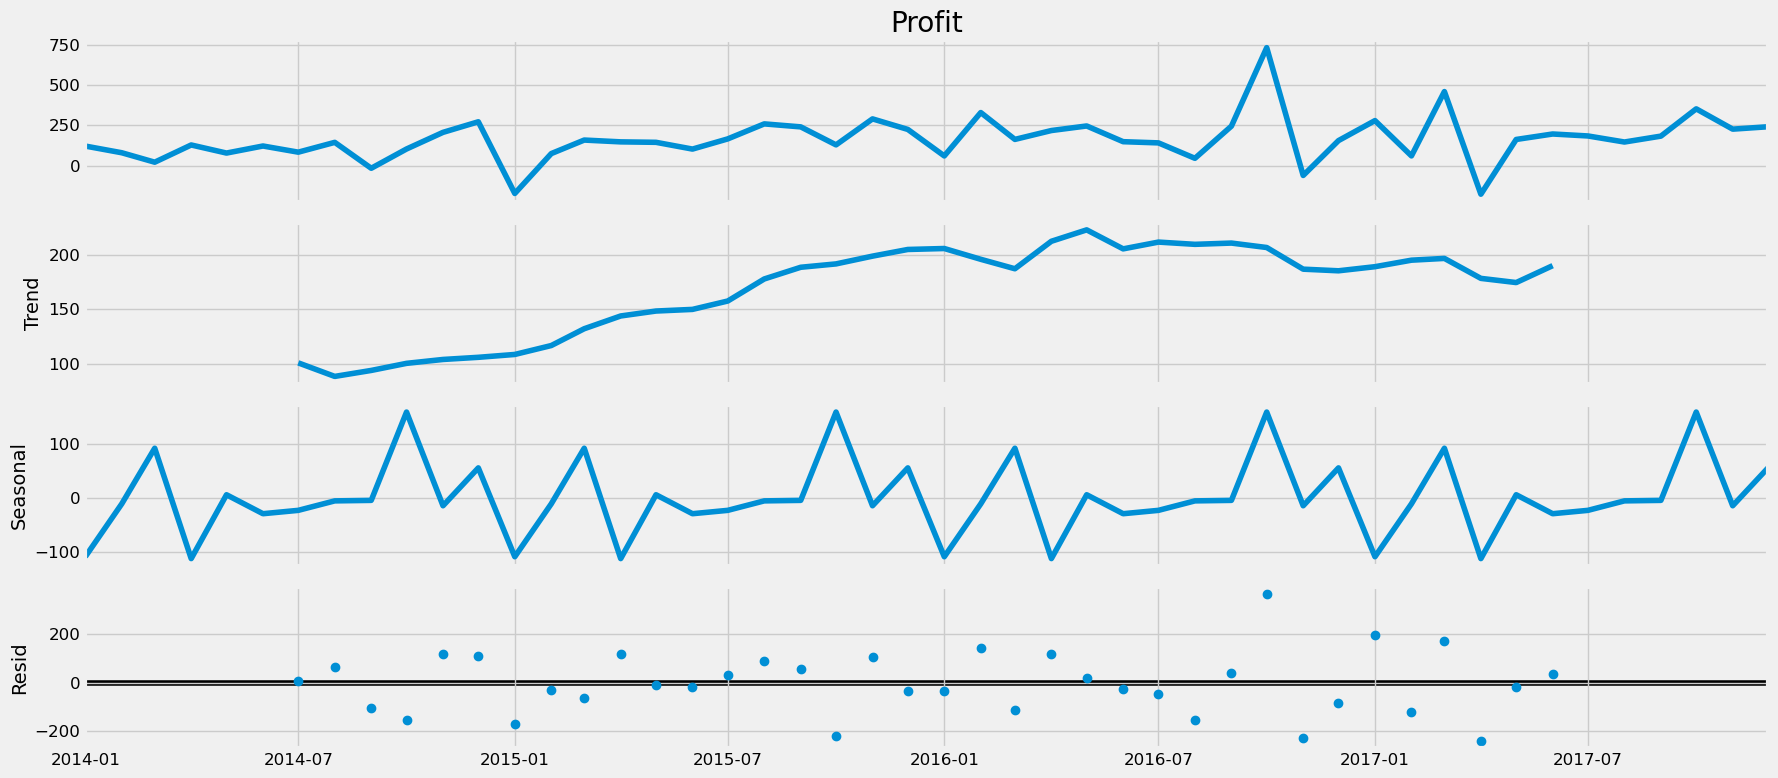

In [13]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:641.8865172603375
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1077.9366734082955
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:472.5378512017617
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:314.1841202086677
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:484.99182617743014


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1154.7160244654444
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:327.4797217722961
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:316.09384931942697
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.1856330681492


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2613.6136586198536
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:458.874885276735
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:299.3579025200157
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:486.5429235701592


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2581.8003072135652
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:327.4490832964673
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:300.685682536272
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:630.0522115795301


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1323.9659545230631
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:491.6294258278457
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:321.4182610937194
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:486.8708222675057


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1290.5618011249899
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.41016425728856
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:322.75789361395533
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:582.7486875142199
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2019.2686626296052


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:451.14965850644546
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:291.5035488217373
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:458.37634507007124


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2084.581939594898
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:318.542785713246
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:293.56391684339224
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:631.2227458816168
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1435.3905554922294
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:472.1066006466535
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:314.5392204309835
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:472.26026604936317


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1425.8888536885418
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:315.36754188866985
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:316.32114184257836
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:595.4380499376352


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1680.2257433749085
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:460.8719496524352
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:301.3556594234143
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:464.0857645862394
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2563.526252048451
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:316.6903805801939
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:302.6839991621931
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:614.2789874327915
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1384.8315640492328
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:480.65793745720174


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:315.27636878947385
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:461.632824574838


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1480.6384004091522
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:316.09413416974417
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:316.96130318454624
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:581.1841479513985


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1607.2174636029672
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:450.25406642818217
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:290.84606483399904
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:448.5680221538701


c:\Users\ignac\miniconda3\envs\matecs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2309.8809485263655
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:305.1359719413726
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:292.83577844677603


In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3011      0.140     -2.156      0.031      -0.575      -0.027
ma.L1         -0.9394      0.325     -2.891      0.004      -1.576      -0.303
ar.S.L12       0.0740      0.536      0.138      0.890      -0.977       1.125
ma.S.L12      -1.0001      0.372     -2.690      0.007      -1.729      -0.271
sigma2      2.042e+04   1.82e-05   1.12e+09      0.000    2.04e+04    2.04e+04


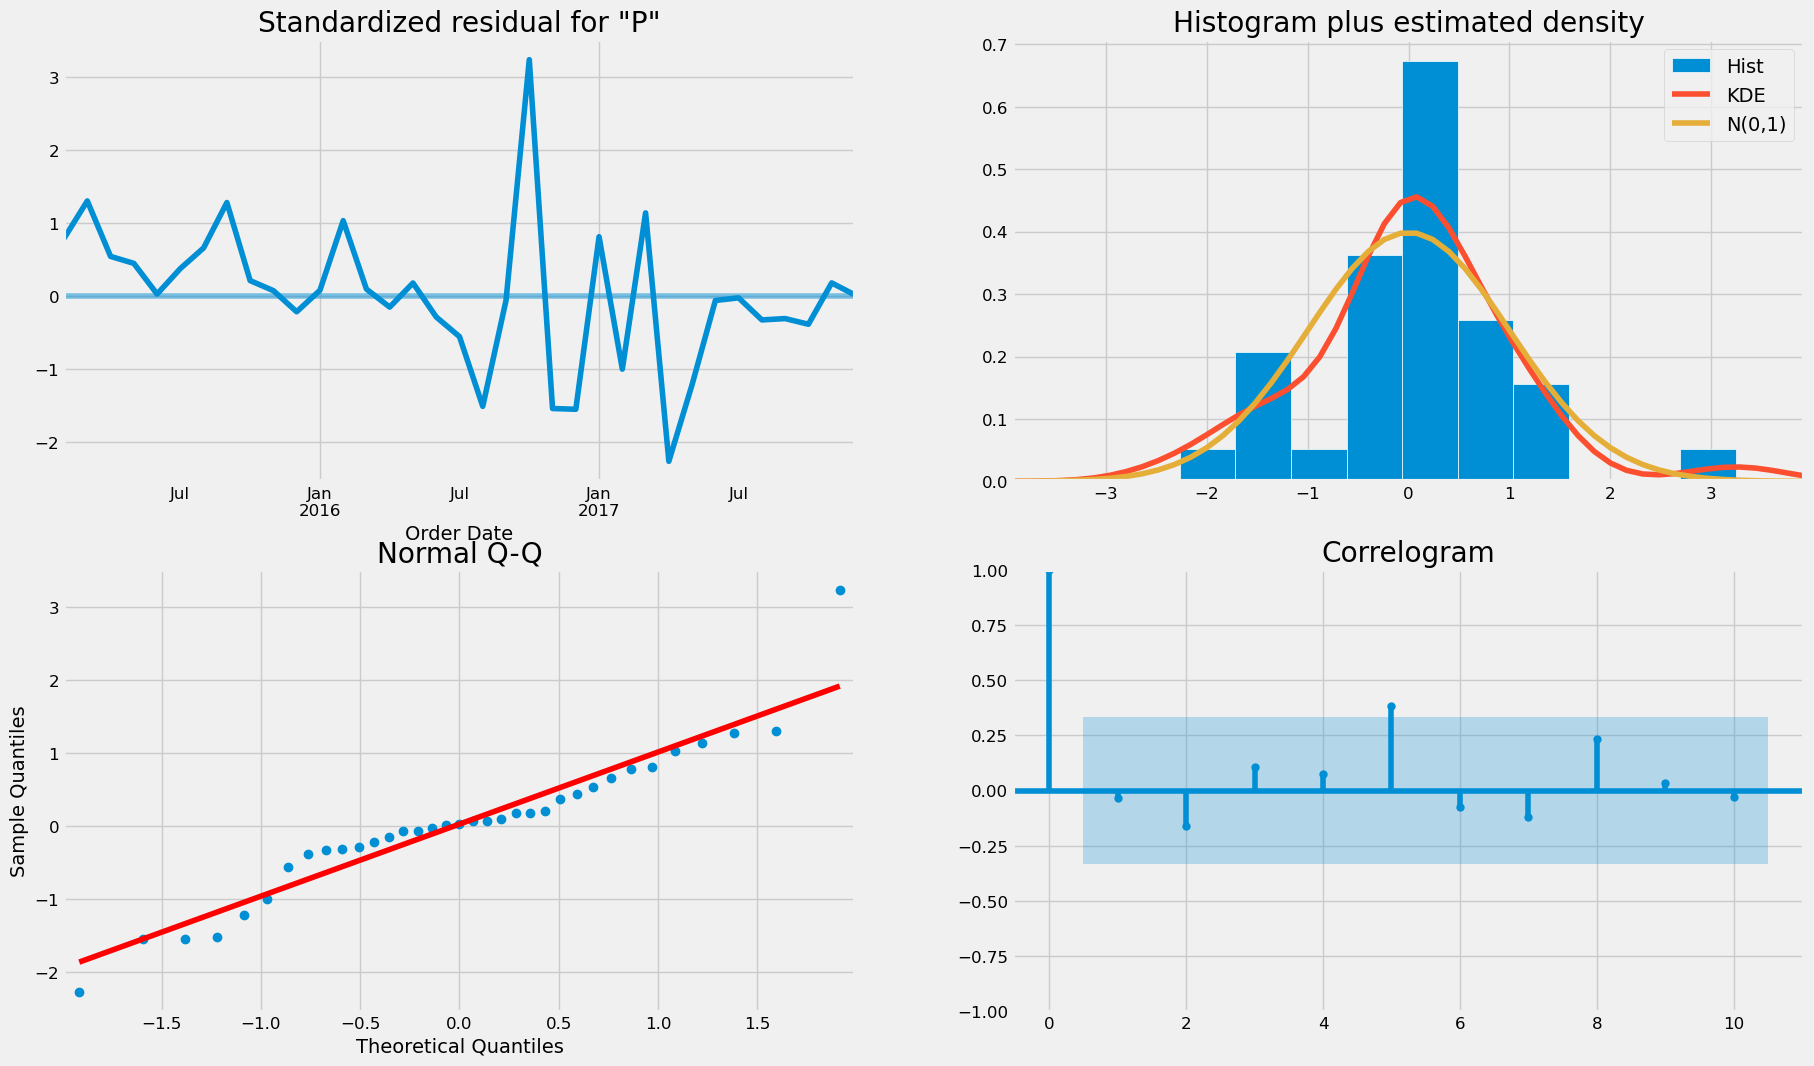

In [18]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

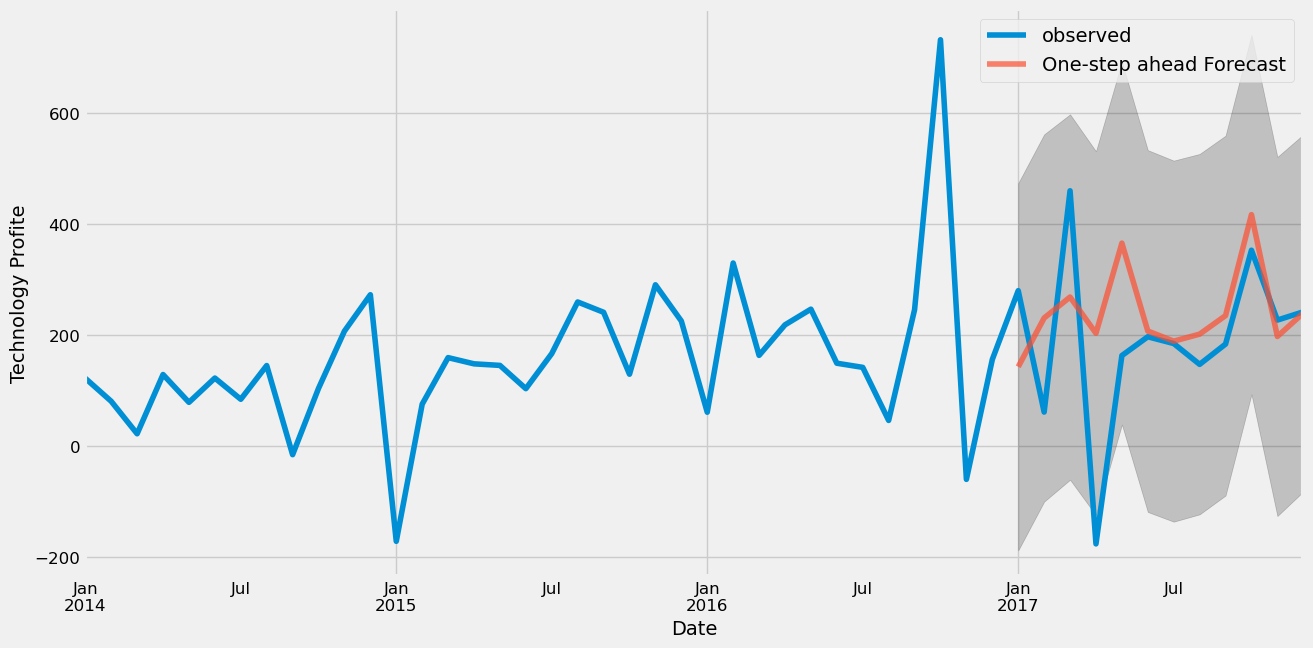

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False) 
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Profite')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 23297.39


In [21]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 152.63


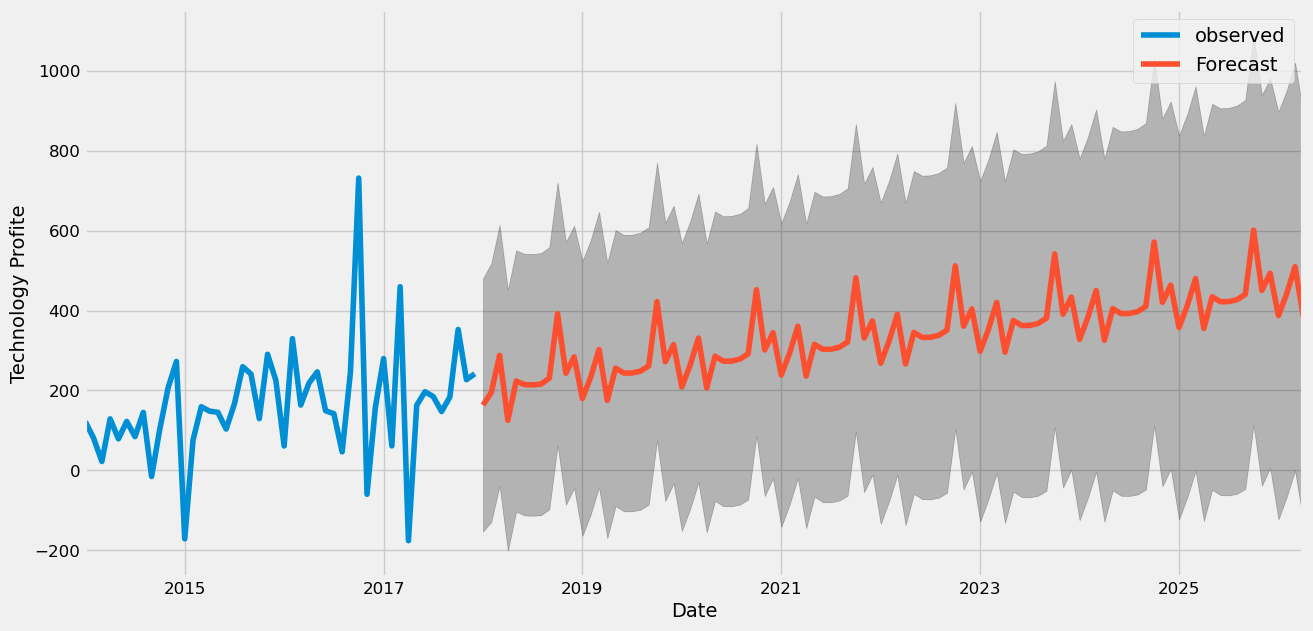

In [22]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Profite')
plt.legend()
plt.show()